In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url="https://arxiv.org/list/cs.AI/recent?skip=0&show=2000"
b=requests.get(url)
b

<Response [200]>

In [3]:
type(b.text)

str

In [18]:
soup=BeautifulSoup(b.text,'html')

In [22]:
a=soup.find_all('div',{'class':'list-title mathjax'})
titles=[]
for i in a:
    i=i.text.replace('Title:','')
    i=i.strip()
    titles.append(i)
len(titles)

700

In [25]:
b=soup.find_all('div',{'class':'list-authors'})
authors=[]
for i in b:
    authors.append(i.text)
len(authors)

700

In [30]:
c=soup.find_all('a',{'title':'Abstract'})
arxiv_id=[]
for i in c:
    i=i.text.strip()
    arxiv_id.append(i[6:])
len(arxiv_id)

700

In [33]:
d=soup.find_all('span',{'class':'primary-subject'})
category=[]
for i in d:
    category.append(i.text)
len(category)

700

In [40]:
links=[]
for i in arxiv_id:
    s="https://arxiv.org/pdf/"+i
    links.append(s)
len(links)

700

In [38]:
import pandas as pd

,Titles,Authors,arxiv_id,Category,Source
0,Differentiable Logic Programming for Distant S...,"Akihiro Takemura, Katsumi Inoue",2408.12591,Artificial Intelligence (cs.AI),https://arxiv.org/pdf/2408.12591
1,MuMA-ToM: Multi-modal Multi-Agent Theory of Mind,"Haojun Shi, Suyu Ye, Xinyu Fang, Chuanyang Jin...",2408.12574,Artificial Intelligence (cs.AI),https://arxiv.org/pdf/2408.12574
2,Pruning By Explaining Revisited: Optimizing At...,"Sayed Mohammad Vakilzadeh Hatefi, Maximilian D...",2408.12568,Artificial Intelligence (cs.AI),https://arxiv.org/pdf/2408.12568
3,MEDCO: Medical Education Copilots Based on A M...,"Hao Wei, Jianing Qiu, Haibao Yu, Wu Yuan",2408.12496,Artificial Intelligence (cs.AI),https://arxiv.org/pdf/2408.12496
4,AI in radiological imaging of soft-tissue and ...,"Douwe J. Spaanderman (1), Matthew Marzetti (2,...",2408.12491,Artificial Intelligence (cs.AI),https://arxiv.org/pdf/2408.12491
...,...,...,...,...,...
695,Graph representations of 3D data for machine l...,Tomasz Prytuła,2408.08336,Machine Learning (cs.LG),https://arxiv.org/pdf/2408.08336
696,Plan with Code: Comparing approaches for robus...,"Nastaran Bassamzadeh, Chhaya Methani",2408.08335,Software Engineering (cs.SE),https://arxiv.org/pdf/2408.08335
697,CodeMirage: Hallucinations in Code Generated b...,"Vibhor Agarwal, Yulong Pei, Salwa Alamir, Xiao...",2408.08333,Software Engineering (cs.SE),https://arxiv.org/pdf/2408.08333
698,First Analysis of the EU Artifical Intelligenc...,"Marion Ho-Dac (UA, CDEP)",2408.08318,Computers and Society (cs.CY),https://arxiv.org/pdf/2408.08318


In [58]:
import requests

def search_doi_by_title(title):
    url = f"https://api.crossref.org/works?query.bibliographic={title}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        items = data.get("message", {}).get("items", [])
        if items:
            # Use the first result
            doi = items[0].get("DOI")
            citation_count = items[0].get("is-referenced-by-count", "Citation count not available")
            return doi, citation_count
        return "DOI not found", "Citation count not available"
    return "Error fetching DOI", "Error fetching citation count"

# Example usage
citations=[]
doi_id=[]
i=1
for title in titles:
    doi, citation_count = search_doi_by_title(title)
    #print(citation_count)
    doi_id.append(doi)
    citations.append(citation_count)
    print(i,end=" ")
    i+=1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [59]:
len(citations)

700

In [61]:
data=pd.DataFrame({'Titles':titles,
                  'Authors':authors,
                  'arxiv_id':arxiv_id,
                  'Category':category,
                  'Source':links,
                  'DOI_id':doi_id,
                  'Citation_count':citations})
data

,Titles,Authors,arxiv_id,Category,Source,DOI_id,Citation_count
0,Differentiable Logic Programming for Distant S...,"Akihiro Takemura, Katsumi Inoue",2408.12568,Artificial Intelligence (cs.AI),https://arxiv.org/pdf/2408.12591,10.1155/2020/8893749,6
1,MuMA-ToM: Multi-modal Multi-Agent Theory of Mind,"Haojun Shi, Suyu Ye, Xinyu Fang, Chuanyang Jin...",2408.12568,Artificial Intelligence (cs.AI),https://arxiv.org/pdf/2408.12574,10.1007/s10458-016-9328-6,7
2,Pruning By Explaining Revisited: Optimizing At...,"Sayed Mohammad Vakilzadeh Hatefi, Maximilian D...",2408.12568,Artificial Intelligence (cs.AI),https://arxiv.org/pdf/2408.12568,10.1109/iscc58397.2023.10218309,0
3,MEDCO: Medical Education Copilots Based on A M...,"Hao Wei, Jianing Qiu, Haibao Yu, Wu Yuan",2408.12568,Artificial Intelligence (cs.AI),https://arxiv.org/pdf/2408.12496,10.1007/s10458-011-9187-0,8
4,AI in radiological imaging of soft-tissue and ...,"Douwe J. Spaanderman (1), Matthew Marzetti (2,...",2408.12568,Artificial Intelligence (cs.AI),https://arxiv.org/pdf/2408.12491,10.1093/med/9780199235636.003.0012,0
...,...,...,...,...,...,...,...
695,Graph representations of 3D data for machine l...,Tomasz Prytuła,2408.12568,Machine Learning (cs.LG),https://arxiv.org/pdf/2408.08336,10.1021/acs.jpca.8b02842.s002,0
696,Plan with Code: Comparing approaches for robus...,"Nastaran Bassamzadeh, Chhaya Methani",2408.12568,Software Engineering (cs.SE),https://arxiv.org/pdf/2408.08335,10.1057/9781137332875.0024,0
697,CodeMirage: Hallucinations in Code Generated b...,"Vibhor Agarwal, Yulong Pei, Salwa Alamir, Xiao...",2408.12568,Software Engineering (cs.SE),https://arxiv.org/pdf/2408.08333,10.18653/v1/2023.findings-emnlp.360,0
698,First Analysis of the EU Artifical Intelligenc...,"Marion Ho-Dac (UA, CDEP)",2408.12568,Computers and Society (cs.CY),https://arxiv.org/pdf/2408.08318,10.55248/gengpi.5.0324.0914,2


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Titles          700 non-null    object
 1   Authors         700 non-null    object
 2   arxiv_id        700 non-null    object
 3   Category        700 non-null    object
 4   Source          700 non-null    object
 5   DOI_id          700 non-null    object
 6   Citation_count  700 non-null    object
dtypes: object(7)
memory usage: 38.4+ KB


In [66]:
data['Citation_count'] = data['Citation_count'].replace('Citation count not available', 0)
data['Citation_count']=data['Citation_count'].astype(int)

In [429]:
data

,Titles,Authors,arxiv_id,Category,Source,DOI_id,Citation_count,no of Authors,Title length
0,183,8,2408.12568,0,https://arxiv.org/pdf/2408.12591,10.1155/2020/8893749,6.00000,2,56
1,419,159,2408.12568,0,https://arxiv.org/pdf/2408.12574,10.1007/s10458-016-9328-6,7.00000,7,48
2,512,433,2408.12568,0,https://arxiv.org/pdf/2408.12568,10.1109/iscc58397.2023.10218309,18.17029,6,94
3,384,158,2408.12568,0,https://arxiv.org/pdf/2408.12496,10.1007/s10458-011-9187-0,8.00000,4,66
4,35,116,2408.12568,0,https://arxiv.org/pdf/2408.12491,10.1093/med/9780199235636.003.0012,18.17029,57,129
...,...,...,...,...,...,...,...,...,...
695,300,501,2408.12568,22,https://arxiv.org/pdf/2408.08336,10.1021/acs.jpca.8b02842.s002,18.17029,1,53
696,493,354,2408.12568,39,https://arxiv.org/pdf/2408.08335,10.1057/9781137332875.0024,18.17029,2,68
697,126,510,2408.12568,39,https://arxiv.org/pdf/2408.08333,10.18653/v1/2023.findings-emnlp.360,18.17029,4,69
698,274,315,2408.12568,8,https://arxiv.org/pdf/2408.08318,10.55248/gengpi.5.0324.0914,2.00000,2,98


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Titles          700 non-null    object
 1   Authors         700 non-null    object
 2   arxiv_id        700 non-null    object
 3   Category        700 non-null    object
 4   Source          700 non-null    object
 5   DOI_id          700 non-null    object
 6   Citation_count  700 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 38.4+ KB


In [72]:
top_papers = data.sort_values(by="Citation_count", ascending=False)
top_papers.head(10)

,Titles,Authors,arxiv_id,Category,Source,DOI_id,Citation_count
184,"Great Memory, Shallow Reasoning: Limits of $k$...","Shangyi Geng, Wenting Zhao, Alexander M Rush",2408.12568,Computation and Language (cs.CL),https://arxiv.org/pdf/2408.11815,10.1016/0888-613x(91)90008-a,444
40,A Percolation Model of Emergence: Analyzing Tr...,"Ekdeep Singh Lubana, Kyogo Kawaguchi, Robert P...",2408.12568,Machine Learning (cs.LG),https://arxiv.org/pdf/2408.12578,10.1093/bioinformatics/btab083,363
456,PA-LLaVA: A Large Language-Vision Assistant fo...,"Dawei Dai, Yuanhui Zhang, Long Xu, Qianlan Yan...",2408.12568,Artificial Intelligence (cs.AI),https://arxiv.org/pdf/2408.09530,10.1016/j.cviu.2015.09.013,256
27,Transformers As Approximations of Solomonoff I...,"Nathan Young, Michael Witbrock",2408.12568,Artificial Intelligence (cs.AI),https://arxiv.org/pdf/2408.12065,10.1109/tit.1978.1055913,212
475,On the Undecidability of Artificial Intelligen...,"Gabriel Adriano de Melo, Marcos Ricardo Omena ...",2408.12568,Artificial Intelligence (cs.AI),https://arxiv.org/pdf/2408.08995,10.1007/s11023-020-09539-2,185
512,Preoperative Rotator Cuff Tear Prediction from...,"Chris Hyunchul Jo, Jiwoong Yang, Byunghwan Jeo...",2408.12568,Image and Video Processing (eess.IV),https://arxiv.org/pdf/2408.09894,10.1016/j.jse.2011.01.039,165
102,Reasoning and Tools for Human-Level Forecasting,"Elvis Hsieh, Preston Fu, Jonathan Chen",2408.12568,Machine Learning (cs.LG),https://arxiv.org/pdf/2408.12036,10.1080/13546780042000046,158
215,Towards Aligned Data Removal via Twin Machine ...,"Yuyao Sun, Zhenxing Niu, Gang hua, Rong jin",2408.12568,Machine Learning (cs.LG),https://arxiv.org/pdf/2408.11433,10.1109/sp.2015.35,156
600,Linking Robustness and Generalization: A k* Di...,"Shashank Kotyan, Pin-Yu Chen, Danilo Vasconcel...",2408.12568,Computer Vision and Pattern Recognition (cs.CV),https://arxiv.org/pdf/2408.09065,10.1109/iccv.2013.35,138
113,Why am I Still Seeing This: Measuring the Effe...,"Jane Castleman, Aleksandra Korolova",2408.12568,Computers and Society (cs.CY),https://arxiv.org/pdf/2408.11910,10.1093/jcr/ucy039,126


In [74]:
!pip install plotly


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
 data['Category'].nunique()

45

In [88]:
import plotly.express as px

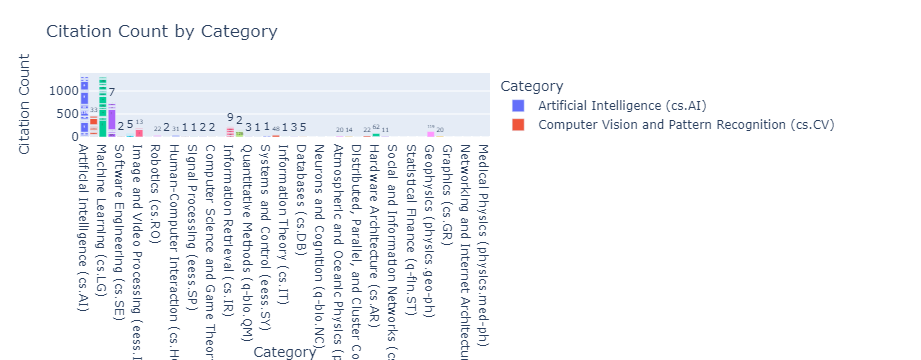

In [94]:
# Create a bar chart
fig = px.bar(data, x='Category', y='Citation_count', title='Citation Count by Category', 
             labels={'Category': 'Category', 'Citation_count': 'Citation Count'},
             color='Category', text='Citation_count')

# Show the plot
fig.show()


In [95]:
data['Category'].unique()

array(['Artificial Intelligence (cs.AI)',
       'Computer Vision and Pattern Recognition (cs.CV)',
       'Machine Learning (cs.LG)', 'Computation and Language (cs.CL)',
       'Software Engineering (cs.SE)', 'Sound (cs.SD)',
       'Image and Video Processing (eess.IV)', 'Biomolecules (q-bio.BM)',
       'Robotics (cs.RO)', 'Data Structures and Algorithms (cs.DS)',
       'Human-Computer Interaction (cs.HC)',
       'Cryptography and Security (cs.CR)', 'Signal Processing (eess.SP)',
       'Machine Learning (stat.ML)',
       'Computer Science and Game Theory (cs.GT)',
       'Computational Engineering, Finance, and Science (cs.CE)',
       'Information Retrieval (cs.IR)', 'Computers and Society (cs.CY)',
       'Quantitative Methods (q-bio.QM)',
       'Neural and Evolutionary Computing (cs.NE)',
       'Systems and Control (eess.SY)', 'Multiagent Systems (cs.MA)',
       'Information Theory (cs.IT)', 'Logic in Computer Science (cs.LO)',
       'Databases (cs.DB)', 'Programming Lang

In [111]:
authors_count=[]
for i in authors:
    i=i.split(',')
    authors_count.append(len(i))
len(authors_count)
title_len=[]
for i in titles:
    title_len.append(len(i))

In [198]:
data=pd.DataFrame({'Titles':titles,
                  'Authors':authors,
                  'arxiv_id':arxiv_id,
                  'Category':category,
                  'Source':links,
                  'DOI_id':doi_id,
                  'Citation_count':citations,
                  'no of Authors':authors_count,
                  'Title length':title_len})
data

,Titles,Authors,arxiv_id,Category,Source,DOI_id,Citation_count,no of Authors,Title length
0,Differentiable Logic Programming for Distant S...,"Akihiro Takemura, Katsumi Inoue",2408.12568,Artificial Intelligence (cs.AI),https://arxiv.org/pdf/2408.12591,10.1155/2020/8893749,6,2,56
1,MuMA-ToM: Multi-modal Multi-Agent Theory of Mind,"Haojun Shi, Suyu Ye, Xinyu Fang, Chuanyang Jin...",2408.12568,Artificial Intelligence (cs.AI),https://arxiv.org/pdf/2408.12574,10.1007/s10458-016-9328-6,7,7,48
2,Pruning By Explaining Revisited: Optimizing At...,"Sayed Mohammad Vakilzadeh Hatefi, Maximilian D...",2408.12568,Artificial Intelligence (cs.AI),https://arxiv.org/pdf/2408.12568,10.1109/iscc58397.2023.10218309,0,6,94
3,MEDCO: Medical Education Copilots Based on A M...,"Hao Wei, Jianing Qiu, Haibao Yu, Wu Yuan",2408.12568,Artificial Intelligence (cs.AI),https://arxiv.org/pdf/2408.12496,10.1007/s10458-011-9187-0,8,4,66
4,AI in radiological imaging of soft-tissue and ...,"Douwe J. Spaanderman (1), Matthew Marzetti (2,...",2408.12568,Artificial Intelligence (cs.AI),https://arxiv.org/pdf/2408.12491,10.1093/med/9780199235636.003.0012,0,57,129
...,...,...,...,...,...,...,...,...,...
695,Graph representations of 3D data for machine l...,Tomasz Prytuła,2408.12568,Machine Learning (cs.LG),https://arxiv.org/pdf/2408.08336,10.1021/acs.jpca.8b02842.s002,0,1,53
696,Plan with Code: Comparing approaches for robus...,"Nastaran Bassamzadeh, Chhaya Methani",2408.12568,Software Engineering (cs.SE),https://arxiv.org/pdf/2408.08335,10.1057/9781137332875.0024,0,2,68
697,CodeMirage: Hallucinations in Code Generated b...,"Vibhor Agarwal, Yulong Pei, Salwa Alamir, Xiao...",2408.12568,Software Engineering (cs.SE),https://arxiv.org/pdf/2408.08333,10.18653/v1/2023.findings-emnlp.360,0,4,69
698,First Analysis of the EU Artifical Intelligenc...,"Marion Ho-Dac (UA, CDEP)",2408.12568,Computers and Society (cs.CY),https://arxiv.org/pdf/2408.08318,10.55248/gengpi.5.0324.0914,2,2,98


In [102]:
data['no of Authors'].nunique()

22

In [103]:
data['Title length'].nunique()

121

In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
label=LabelEncoder()

In [107]:
label

LabelEncoder()

In [209]:
data['Category']=label.fit_transform(data['Category'])
data['Category']

0       0
1       0
2       0
3       0
4       0
       ..
695    22
696    39
697    39
698     8
699     7
Name: Category, Length: 700, dtype: int64

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Titles          700 non-null    object
 1   Authors         700 non-null    object
 2   arxiv_id        700 non-null    object
 3   Category        700 non-null    int64 
 4   Source          700 non-null    object
 5   DOI_id          700 non-null    object
 6   Citation_count  700 non-null    int64 
 7   no of Authors   700 non-null    int64 
 8   Title length    700 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 49.3+ KB


In [207]:
data['Citation_count'] = data['Citation_count'].replace('Citation count not available', 0)
data['Citation_count']=data['Citation_count'].astype(int)


In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Titles          700 non-null    object
 1   Authors         700 non-null    object
 2   arxiv_id        700 non-null    object
 3   Category        700 non-null    int64 
 4   Source          700 non-null    object
 5   DOI_id          700 non-null    object
 6   Citation_count  700 non-null    int64 
 7   no of Authors   700 non-null    int64 
 8   Title length    700 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 49.3+ KB


In [213]:
data

,Titles,Authors,arxiv_id,Category,Source,DOI_id,Citation_count,no of Authors,Title length
0,Differentiable Logic Programming for Distant S...,"Akihiro Takemura, Katsumi Inoue",2408.12568,0,https://arxiv.org/pdf/2408.12591,10.1155/2020/8893749,6,2,56
1,MuMA-ToM: Multi-modal Multi-Agent Theory of Mind,"Haojun Shi, Suyu Ye, Xinyu Fang, Chuanyang Jin...",2408.12568,0,https://arxiv.org/pdf/2408.12574,10.1007/s10458-016-9328-6,7,7,48
2,Pruning By Explaining Revisited: Optimizing At...,"Sayed Mohammad Vakilzadeh Hatefi, Maximilian D...",2408.12568,0,https://arxiv.org/pdf/2408.12568,10.1109/iscc58397.2023.10218309,0,6,94
3,MEDCO: Medical Education Copilots Based on A M...,"Hao Wei, Jianing Qiu, Haibao Yu, Wu Yuan",2408.12568,0,https://arxiv.org/pdf/2408.12496,10.1007/s10458-011-9187-0,8,4,66
4,AI in radiological imaging of soft-tissue and ...,"Douwe J. Spaanderman (1), Matthew Marzetti (2,...",2408.12568,0,https://arxiv.org/pdf/2408.12491,10.1093/med/9780199235636.003.0012,0,57,129
...,...,...,...,...,...,...,...,...,...
695,Graph representations of 3D data for machine l...,Tomasz Prytuła,2408.12568,22,https://arxiv.org/pdf/2408.08336,10.1021/acs.jpca.8b02842.s002,0,1,53
696,Plan with Code: Comparing approaches for robus...,"Nastaran Bassamzadeh, Chhaya Methani",2408.12568,39,https://arxiv.org/pdf/2408.08335,10.1057/9781137332875.0024,0,2,68
697,CodeMirage: Hallucinations in Code Generated b...,"Vibhor Agarwal, Yulong Pei, Salwa Alamir, Xiao...",2408.12568,39,https://arxiv.org/pdf/2408.08333,10.18653/v1/2023.findings-emnlp.360,0,4,69
698,First Analysis of the EU Artifical Intelligenc...,"Marion Ho-Dac (UA, CDEP)",2408.12568,8,https://arxiv.org/pdf/2408.08318,10.55248/gengpi.5.0324.0914,2,2,98


In [218]:
data['Titles']=label.fit_transform(data['Titles'])
data['Titles']

0      183
1      419
2      512
3      384
4       35
      ... 
695    300
696    493
697    126
698    274
699    579
Name: Titles, Length: 700, dtype: int64

In [219]:
data['Authors']=label.fit_transform(data['Authors'])
data['Authors']

0        8
1      159
2      433
3      158
4      116
      ... 
695    501
696    354
697    510
698    315
699     80
Name: Authors, Length: 700, dtype: int64

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Titles          700 non-null    int64 
 1   Authors         700 non-null    int64 
 2   arxiv_id        700 non-null    object
 3   Category        700 non-null    int64 
 4   Source          700 non-null    object
 5   DOI_id          700 non-null    object
 6   Citation_count  700 non-null    int64 
 7   no of Authors   700 non-null    int64 
 8   Title length    700 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 49.3+ KB


In [240]:
import pandas as pd

# Example DataFrame


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Citation_count'].quantile(0.25)
Q3 = data['Citation_count'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Set the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = data[(data['Citation_count'] >= lower_bound) & (data['Citation_count'] <= upper_bound)]

print(df_no_outliers)


     Titles  Authors    arxiv_id  Category                            Source  \
2       512      433  2408.12568         0  https://arxiv.org/pdf/2408.12568   
4        35      116  2408.12568         0  https://arxiv.org/pdf/2408.12491   
5       157       61  2408.12568         0  https://arxiv.org/pdf/2408.12420   
6       558      387  2408.12568         0  https://arxiv.org/pdf/2408.12369   
7       298      601  2408.12568         0  https://arxiv.org/pdf/2408.12333   
..      ...      ...         ...       ...                               ...   
694     248      384  2408.12568        34  https://arxiv.org/pdf/2408.08341   
695     300      501  2408.12568        22  https://arxiv.org/pdf/2408.08336   
696     493      354  2408.12568        39  https://arxiv.org/pdf/2408.08335   
697     126      510  2408.12568        39  https://arxiv.org/pdf/2408.08333   
698     274      315  2408.12568         8  https://arxiv.org/pdf/2408.08318   

                                  DOI_i

In [281]:
mean=data[data['Citation_count']!=0]['Citation_count'].mean()
data['Citation_count']=data['Citation_count'].replace(0,mean)
data

,Titles,Authors,arxiv_id,Category,Source,DOI_id,Citation_count,no of Authors,Title length
0,183,8,2408.12568,0,https://arxiv.org/pdf/2408.12591,10.1155/2020/8893749,6.00000,2,56
1,419,159,2408.12568,0,https://arxiv.org/pdf/2408.12574,10.1007/s10458-016-9328-6,7.00000,7,48
2,512,433,2408.12568,0,https://arxiv.org/pdf/2408.12568,10.1109/iscc58397.2023.10218309,18.17029,6,94
3,384,158,2408.12568,0,https://arxiv.org/pdf/2408.12496,10.1007/s10458-011-9187-0,8.00000,4,66
4,35,116,2408.12568,0,https://arxiv.org/pdf/2408.12491,10.1093/med/9780199235636.003.0012,18.17029,57,129
...,...,...,...,...,...,...,...,...,...
695,300,501,2408.12568,22,https://arxiv.org/pdf/2408.08336,10.1021/acs.jpca.8b02842.s002,18.17029,1,53
696,493,354,2408.12568,39,https://arxiv.org/pdf/2408.08335,10.1057/9781137332875.0024,18.17029,2,68
697,126,510,2408.12568,39,https://arxiv.org/pdf/2408.08333,10.18653/v1/2023.findings-emnlp.360,18.17029,4,69
698,274,315,2408.12568,8,https://arxiv.org/pdf/2408.08318,10.55248/gengpi.5.0324.0914,2.00000,2,98


In [418]:
x=data[['Category']]
y=data[['Citation_count']]

In [431]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [432]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=64)

In [433]:
model=LinearRegression()
model

LinearRegression()

In [434]:
scaler=StandardScaler()

In [435]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [436]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [437]:
y_pred=model.predict(x_test_scaled)

In [438]:
y_pred

array([[17.94274715],
       [17.94951037],
       [18.1524069 ],
       [18.17945977],
       [18.15917011],
       [18.15917011],
       [18.17945977],
       [18.15917011],
       [18.20651264],
       [18.15917011],
       [18.05772185],
       [17.9630368 ],
       [18.12535403],
       [18.20651264],
       [18.09830116],
       [18.15917011],
       [17.94274715],
       [18.17945977],
       [17.94274715],
       [18.18622298],
       [18.15917011],
       [18.15917011],
       [18.20651264],
       [18.15917011],
       [18.10506437],
       [18.17945977],
       [18.1524069 ],
       [18.05772185],
       [17.95627359],
       [18.1524069 ],
       [18.05772185],
       [18.18622298],
       [18.15917011],
       [18.08477472],
       [18.17945977],
       [17.93598393],
       [18.05095863],
       [18.05772185],
       [18.17945977],
       [18.05772185],
       [18.15917011],
       [18.05772185],
       [18.05772185],
       [18.20651264],
       [18.20651264],
       [18

In [439]:
mse=mean_squared_error(y_test,y_pred)
mse

np.float64(501.64249868285646)

In [440]:
accuracy=r2_score(y_test,y_pred)
accuracy

0.00012067197512866112

In [441]:
cat=int(input("enter catogery: "))

enter catogery:  42


In [443]:
import numpy as np
model.predict(np.array([[cat]]))

array([[14.3640948]])

In [444]:
import pickle

In [445]:
with open('data.pkl','wb') as f:
    pickle.dump(model,f)

In [446]:
pre_model=pickle.load(open('data.pkl','rb'))


In [447]:
pre_model.predict(np.array([[cat]]))

array([[14.3640948]])